In [2]:
# Code developed by Dirk Colbry
# This code snipit tries to read from your computer's camera.  It is not fully tested so it may not work for everyone.

from IPython.display import HTML

main_text = """
<video id="video" width="320" height="240" autoplay></video>
<button id="snap">Snap Photo</button>
<canvas id="canvas" width="320" height="240"></canvas>

<script>
// Grab elements, create settings, etc.
var video = document.getElementById('video');

// Get access to the camera!
if(navigator.mediaDevices && navigator.mediaDevices.getUserMedia) {
    // Not adding `{ audio: true }` since we only want video now
    navigator.mediaDevices.getUserMedia({ video: true }).then(function(stream) {
        //video.src = window.URL.createObjectURL(stream);
        //video.play();
        video.srcObject=stream;
        video.play();
    });
}

// Elements for taking the snapshot
var canvas = document.getElementById('canvas');
var context = canvas.getContext('2d');
var video = document.getElementById('video');

// Trigger photo take
document.getElementById("snap").addEventListener("click", function() {
	context.drawImage(video, 0, 0, 320, 240);
    var myCanvas = document.getElementById('canvas');
    var image = myCanvas.toDataURL("image/png");
    IPython.notebook.kernel.execute("print('testing')")
    IPython.notebook.kernel.execute("image = '" + image + "'")
});
</script>

"""
HTML(main_text)

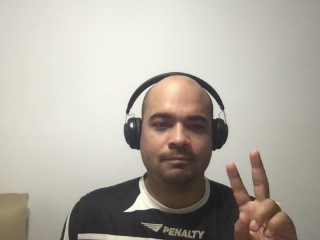

In [3]:
from PIL import Image
import base64
import io

pil_im = Image.open(io.BytesIO(base64.b64decode(image.split(',')[1])))
pil_im

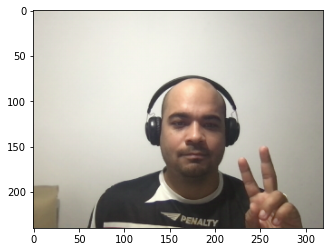

In [4]:


%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

im3 = np.array(pil_im)
im3 = im3[:,:,0:3]
plt.imshow(im3)

